## Task
Iam going to perform Data Analysis and examine trends & correlations within our data. I would like to make a Machine Learning algorithm where we can train our AI to learn & improve from experience. Thus, I would want to predict the amount of suicides numbers in a certain demographic. We want to find the answers of the following questions.
1. Which year has the most suicides ? Which year has the least suicides?
2. Which country has the most suicides ? Which country has the least suicides?
3. Are certain age groups more inclined to suicide?
4. What is the relationship between gender and the number of suicides?

## Features
* country (Categorical)
* year: year of suicide (Categorical)
* sex: Male, Female (Categorical)
* age (Categorical)
* population: (#)

## Target variable / predictor
* suicides_no

## 1. Data Wrangling

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# import dataset
df = pd.read_csv(r"C:\Users\ALBIN\Downloads\EDA project\who_suicide_statistics.csv")

In [3]:
df.head()

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0


* Our data set has 5 Features (Country, Year, Gender, Age, Population). While the suicide_no is what we would like to predict.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43776 entries, 0 to 43775
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      43776 non-null  object 
 1   year         43776 non-null  int64  
 2   sex          43776 non-null  object 
 3   age          43776 non-null  object 
 4   suicides_no  41520 non-null  float64
 5   population   38316 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.0+ MB


In [5]:
print("(Rows, columns): " + str(df.shape))
df.columns

(Rows, columns): (43776, 6)


Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population'], dtype='object')

In [6]:
# checking for missing values
df.isnull().sum()

country           0
year              0
sex               0
age               0
suicides_no    2256
population     5460
dtype: int64

* We have 2,256 missing data from suicide_no & 5460 missing data from population.

In [7]:
# fill the null values with zero
df['suicides_no'].fillna(df['suicides_no'].mean(),inplace = True)
df['population'].fillna(df['population'].mean(),inplace = True)
df.isnull().sum()

country        0
year           0
sex            0
age            0
suicides_no    0
population     0
dtype: int64

* From above, we can see that, suicides_no & population, have null values.
* Lets, fill the null values with zero using ‘fillna()’. Now, we have no null columns!

In [8]:
# check unique values
# different age groups
df['age'].unique()

array(['15-24 years', '25-34 years', '35-54 years', '5-14 years',
       '55-74 years', '75+ years'], dtype=object)

In [9]:
# lists of different countries
df['country'].unique()

array(['Albania', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bermuda', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil',
       'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria',
       'Cabo Verde', 'Canada', 'Cayman Islands', 'Chile', 'Colombia',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
       'Denmark', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Falkland Islands (Malvinas)', 'Fiji',
       'Finland', 'France', 'French Guiana', 'Georgia', 'Germany',
       'Greece', 'Grenada', 'Guadeloupe', 'Guatemala', 'Guyana', 'Haiti',
       'Honduras', 'Hong Kong SAR', 'Hungary', 'Iceland',
       'Iran (Islamic Rep of)', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kiribati', 'Kuwait',
       'Kyrgyzstan', 'Latvia', 'Lithuania

In [10]:
df['country'].nunique()

141

* We can’t perform one-hot encoding because there are too many unique values for ‘country’.

In [11]:
# all unique years
df['year'].unique()

array([1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 1983, 1984,
       2016, 1979, 1980, 1981, 1982], dtype=int64)

## 2. Exploratory Data Analysis

### 1. Which year has the most suicides ? Which year has the least suicides?

In [12]:
df['suicides_no'] = df['suicides_no'].replace(0,np.NAN)

mean_value=df['suicides_no'].mean()
df['suicides_no']=df['suicides_no'].fillna(mean_value)

def find_minmax(x):
     #use the function 'idmin' to find the index of lowest suicide
    min_index = df[x].idxmin()
    #use the function 'idmax' to find the index of Highest suicide
    high_index = df[x].idxmax()
    
    high = pd.DataFrame(df.loc[high_index,:])
    low = pd.DataFrame(df.loc[min_index,:])
    
    #print the Year with high and low suicide
    print("Year Which Has Highest "+ x + " : ",df['year'][high_index])
    print("Year Which Has Lowest "+ x + "  : ",df['year'][min_index])
    return pd.concat([high,low],axis = 1)

find_minmax('suicides_no')

Year Which Has Highest suicides_no :  1994
Year Which Has Lowest suicides_no  :  1987


,33128,29
country,Russian Federation,Albania
year,1994,1987
sex,male,female
age,35-54 years,75+ years
suicides_no,22338.0,1.0
population,19044200.0,35600.0


* Here we created a Min Max function that allows us to located the min max of a column grouping.

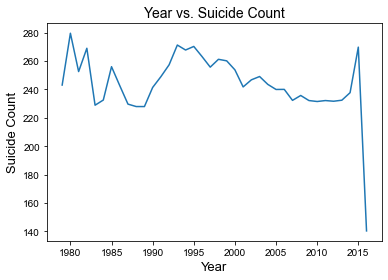

In [13]:
# year-wise analysis of average number sucidies of each year             
df.groupby('year')['suicides_no'].mean().plot() 
#setup the title and labels.
plt.title("Year vs. Suicide Count",fontsize = 14) 
plt.xlabel('Year',fontsize = 13) 
plt.ylabel('Suicide Count',fontsize = 13)  
#setup the figure size and style. 
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style("whitegrid")

### 2. Which country has the most suicides ? Which country has the least suicides?

In [14]:
def find_minmax(x):
     #use the function 'idmin' to find the index of lowest suicide
    min_index = df[x].idxmin()
    #use the function 'idmax' to find the index of Highest suicide
    high_index = df[x].idxmax()
    
    high = pd.DataFrame(df.loc[high_index,:])
    low = pd.DataFrame(df.loc[min_index,:])
    
    #print the country with high and low suicide
    print("Country Which Has Highest "+ x + " : ",df['country'][high_index])
    print("Country Which Has Lowest "+ x + "  : ",df['country'][min_index])
    return pd.concat([low,high],axis = 1)

find_minmax('suicides_no')

Country Which Has Highest suicides_no :  Russian Federation
Country Which Has Lowest suicides_no  :  Albania


,29,33128
country,Albania,Russian Federation
year,1987,1994
sex,female,male
age,75+ years,35-54 years
suicides_no,1.0,22338.0
population,35600.0,19044200.0


## Feature Engineering
Lets make a new column to calculate the Suicide per Population Size Ratio, to better understand our data

In [15]:
# creating new column 
df['suicide_per_pop'] = df['suicides_no']/df['population']
df.head(2)

,country,year,sex,age,suicides_no,population,suicide_per_pop
0,Albania,1985,female,15-24 years,193.31539,277900.0,0.000696
1,Albania,1985,female,25-34 years,193.31539,246800.0,0.000783


In [16]:
df.head(3)

,country,year,sex,age,suicides_no,population,suicide_per_pop
0,Albania,1985,female,15-24 years,193.31539,277900.0,0.000696
1,Albania,1985,female,25-34 years,193.31539,246800.0,0.000783
2,Albania,1985,female,35-54 years,193.31539,267500.0,0.000723


In [17]:
find_minmax('suicide_per_pop')

Country Which Has Highest suicide_per_pop :  Rodrigues
Country Which Has Lowest suicide_per_pop  :  Egypt


,12993,32351
country,Egypt,Rodrigues
year,2005,2004
sex,male,male
age,5-14 years,75+ years
suicides_no,1.0,245.455652
population,9543088.0,259.0
suicide_per_pop,0.0,0.947705


Albania had the lowest suicide count, while Zimbabwe & Russian Federation, had the largest suicide count. A reason the Russian Federations may have a large suicide count may be that they have a very large population (144.5 million, while Albania only has about 3 million). It has been reported that Russian levels of alcohol consumption plays an immense role in it’s large suicide count, but their is a lack of data to support this due to Soviet secrecy

### 3. Are certain age groups more inclined to suicide?

In [18]:
sample = df.sample(3)
sample

,country,year,sex,age,suicides_no,population,suicide_per_pop
26985,Netherlands Antilles,1992,male,5-14 years,245.455652,1.664091e+06,0.000148
31079,Puerto Rico,2009,male,75+ years,31.000000,8.576300e+04,0.000361
20435,Italy,2011,male,75+ years,664.000000,2.321431e+06,0.000286


Right now our ‘age’ column is separated into hyphen groups. We want to analyze these groups as numerical data. We must take away the hyphen & create a function that classifies each category into a certain number. We first must remove all instances of a dash & change the object to type int to further analyze it.

In [19]:
# grabs first 2 chars from Age Column
df['AgeNum'] = df['age'].str[:2]

# remove all instances of dash -
df['AgeNum'] = df['AgeNum'].map(lambda x: x.replace('-',''))

# now, convert it to type int (not Object)
df['AgeNum'] = df['AgeNum'].astype(int)

df['AgeNum'].tail(3)

43773     5
43774    55
43775    75
Name: AgeNum, dtype: int32

In [20]:
# creates Age Categories
def AgeGroup(x):
    if(x >= 60):
        return "Elderly"
    elif(x >= 30):
        return "Middle_Aged_Adults"
    elif(x >= 18):
        return "Adults"
    else:
        return "Adolescent"
# Map each row in the Col to the AgeGroup Method
df['AgeCategory'] = df['AgeNum'].map(lambda x: AgeGroup(x))
# convert it back to type String
df['AgeCategory'] = df['AgeCategory'].astype(str)
df['AgeCategory'].tail(3)

43773            Adolescent
43774    Middle_Aged_Adults
43775               Elderly
Name: AgeCategory, dtype: object

* We now created a new column called ‘AgeNum’ 

In [21]:
df.head()

,country,year,sex,age,suicides_no,population,suicide_per_pop,AgeNum,AgeCategory
0,Albania,1985,female,15-24 years,193.31539,277900.0,0.000696,15,Adolescent
1,Albania,1985,female,25-34 years,193.31539,246800.0,0.000783,25,Adults
2,Albania,1985,female,35-54 years,193.31539,267500.0,0.000723,35,Middle_Aged_Adults
3,Albania,1985,female,5-14 years,193.31539,298300.0,0.000648,5,Adolescent
4,Albania,1985,female,55-74 years,193.31539,138700.0,0.001394,55,Middle_Aged_Adults


Text(5.960000000000001, 0.5, 'Suicide_Count')

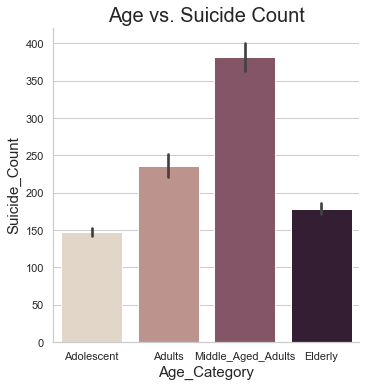

In [22]:
sns.catplot(x="AgeCategory", y="suicides_no",palette="ch:.25", kind="bar",data=df);

plt.title('Age vs. Suicide Count',size=20)
plt.xlabel('Age_Category',size=15)
plt.ylabel('Suicide_Count',size=15)

* The data illustrates that middle aged adults, between the ages of 30 through 60, have the highest suicide count. While elderly and adolescents have about half the amount as middle aged adults.

### 4. What is the relationship between gender and the number of suicides?

In [23]:
df['sex'].value_counts()

female    21888
male      21888
Name: sex, dtype: int64

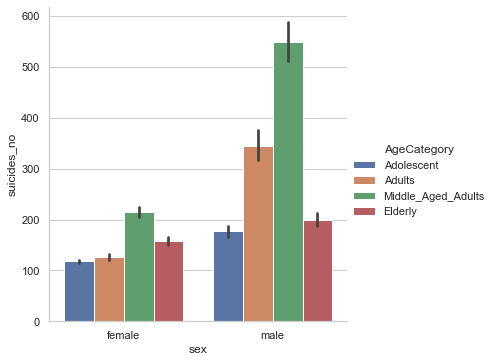

In [24]:
sns.catplot(x="sex", y="suicides_no", hue="AgeCategory", kind="bar", data=df);

Suicide is one of the leading causes of death among all Americans adults. Data show heightened differences in suicide for different sexes. It’s evident that males are more inclined to suicide. For Females, the 4 age categories seem to level off at 150. We can’t say the same for males. Male adults & male middle aged adults are at very high risk of suicide. Both genders show middle aged adults as the leading age group of suicide.

## Machine Learninig (predictive analysis)
* Our goal in this section is to build a multiple linear regression model that will be trained to understand correlation between our features and our predictor. 
* We want to predict Y (suicides_no), given a a specific year, pertaining to a specific age group & gender.

In [25]:
new_df= df.loc[:,['year','sex','AgeNum','suicides_no']]
new_df.head(3)

,year,sex,AgeNum,suicides_no
0,1985,female,15,193.31539
1,1985,female,25,193.31539
2,1985,female,35,193.31539


In [26]:
# Assign the 4 features to X, & the last column to our predictor Y
x = new_df.iloc[:,:-1]
y = new_df.iloc[:,-1]

In [27]:
# Encoding categorical data. The Gender feature, is now encoded using 0 and 1
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
x = np.array(ct.fit_transform(x))

In [ ]:
# Splitting the data set into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state = 1)

In [ ]:
# Training the Multiple Linear Regression model on the Training set
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

In [ ]:
# Predictions
# A 55 year old male, from 2001
print(model.predict([[1,0,2001,55]]))

Would yield a suicide count of approximately 187.

## 5. Conclusions
* There was a decrease in suicides toward the 80’s. This could be due to awareness of suicide & mental health in the 80s, as well as improved recognition of those at risk. But shortly after that their is a rise suicides that we are seeing.
* Russian levels of alcohol consumption plays an immense role in it’s large suicide count, but their is a lack of data to support this due to Soviet secrecy.
* The data illustrates that middle aged adults, between the ages of 30 through 60, have the highest suicide count. While elderly and adolescents have about half the amount as middle aged adults.
* Suicide is one of the leading causes of death among all Americans adults. Data show alarming differences in suicide for different sexes. It’s evident that males are more inclined to suicide, than females. In addition, Mental health is a major predictor for suicide.